# Plotting Jupiter & Trojans

Plot eccentricities and longitudes of pericenter for the Trojans and Jupiter

## Build the sim

In [1]:
cd /Users/mariahjones/Desktop/Research/projects/Orbitals/

/Users/mariahjones/Desktop/Research/projects/Orbitals


In [2]:
import rebound
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
sim = rebound.Simulation()
sim.integrator = "mercurius"
sim.ri_mercurius.L = "infinity"
sim.ri_mercurius.r_crit_hill = 3
sim.dt = 1

## Adding Lucy targets

Select 5 asteroid targets from JPL's Lucy spacecraft and add them to the simulation.

In [4]:
# Convert au/days to au/years
vel_x = [0.0, -6.584186332911239E-03,-4.787910318140170E-03, -4.490752466622040E-03,-5.061566077016356E-03, -6.921978329380989E-03, 1.720201882234832E-03]
vel_y = [0.0, 4.208054867943963E-03,-6.117250969489108E-03, -6.104130925957561E-03, -5.523543906600741E-03, -3.555983684565142E-03, 8.285673540333695E-03]
vel_z = [0.0, 1.298323287693746E-04, -1.607348091112789E-04, -1.018925991237289E-04, -6.120420008003242E-04, -9.050671118572943E-04, 1.913885441042937E-03]

vel_x = np.array(vel_x) * 365.25636
vel_y = np.array(vel_y) * 365.25636
vel_z = np.array(vel_z) * 365.25636


# Convert mass to integration units
sol_mass = (2 * np.pi)**2 # integration units
sol_gm = (1.33E20) # real units

jup_gm = 1.27E17 
jup_mass = (jup_gm / sol_gm) * sol_mass



# add particles to the simulation

sim.add(m = sol_mass, x = 0, y = 0, z = 0,
        vx = vel_x[0], vy = vel_y[0], vz = vel_z[0], hash = 'Sun')

sim.add(m = jup_mass, x = 2.559959519433896E+00, y = 4.317254861986015E+00, z =-7.520814690745442E-02,
        vx= vel_x[1], vy= vel_y[1], vz= vel_z[1], hash = 'Jupiter')

sim.add(x = -4.201536524694033E+00, y = 2.718676637762465E+00, z = 6.884284956765065E-01,
        vx = vel_x[2], vy = vel_y[2], vz = vel_z[2], hash = 'Eurybates')

sim.add(x = -4.343695308089850E+00, y = 2.555361876963556E+00, z = 1.146716525792677E+00,
        vx= vel_x[3], vy= vel_y[3], vz= vel_z[3], hash = 'Polymele')

sim.add(x = -3.992103726537269E+00, y = 3.297493797829746E+00, z = -9.897818491470088E-01,
        vx= vel_x[4], vy= vel_y[4], vz= vel_z[4], hash = 'Leucus')

sim.add(x = -2.310266153292456E+00, y = 4.373182945338368E+00, z = -4.663571003849790E-01,
        vx= vel_x[5], vy= vel_y[5], vz= vel_z[5], hash = 'Orus')

sim.add(x = 4.224857377650168E+00, y = -5.904764895068263E-01, z = -1.368216676274054E+00,
        vx= vel_x[6], vy= vel_y[6], vz= vel_z[6], hash = 'Patroclus')

In [11]:
Nout = 10000  # number of points to display, corresponding to 10^4 years with 1 year time steps
tmax = 10000  # run the simulation for 10^4 years
Nbodies = 6

times = np.linspace(0., tmax, Nout)
ps = sim.particles

ecc = np.zeros((Nbodies, Nout))
varpi = np.zeros((Nbodies, Nout))
inclination = np.zeros((Nbodies, Nout))  # New array for inclination

for i, time in enumerate(times):
    sim.integrate(time)
    os = sim.orbits()
    for j in range(Nbodies):
        ecc[j][i] = os[j].e
        varpi[j][i] = os[j].Omega + os[j].omega
        inclination[j][i] = os[j].inc  # Storing the inclination

# Now you have the inclination data stored in the inclination array


In [12]:
print(sim.particles[1].a)
orbits = sim.orbits()
for orbit in orbits:
    print(orbit)

5.202208160973073
<rebound.Orbit instance, a=5.202208160973073 e=0.04825377775939374 inc=0.02275192535064222 Omega=1.7543609565111673 omega=4.772588700013619 f=2.001707705729471>
<rebound.Orbit instance, a=5.272967420353621 e=0.08235915185824857 inc=0.13111055925114778 Omega=0.36218846108805375 omega=0.38984250695372147 f=2.4100681651427287>
<rebound.Orbit instance, a=5.213602630865832 e=0.0582904470584442 inc=0.21671716645701045 Omega=0.4273270795542825 omega=5.998363284579509 f=2.795527199245063>
<rebound.Orbit instance, a=5.263106540330988 e=0.05441962730434213 inc=0.21505363200513333 Omega=-2.692057212652806 omega=3.390311695119888 f=2.9878738999890775>
<rebound.Orbit instance, a=5.158697694327992 e=0.051759476992561754 inc=0.15169957455456656 Omega=-2.137643961852099 omega=3.5546758832238385 f=2.180962168657537>
<rebound.Orbit instance, a=5.172298908909358 e=0.054075361568026475 inc=0.38526486681753314 Omega=0.7339397436008889 omega=2.008091825954917 f=4.501164613880753>


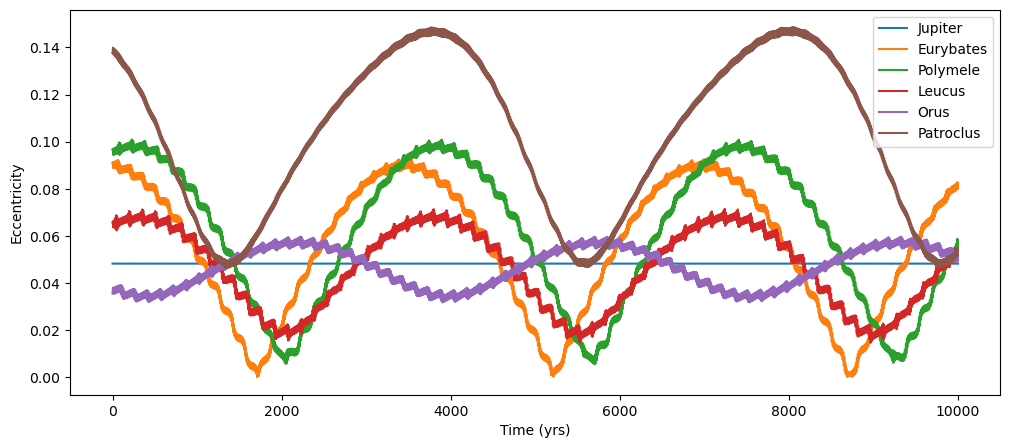

In [20]:
labels = ['Jupiter', 'Eurybates', 'Polymele', 'Leucus', 'Orus', 'Patroclus']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[0])
plt.plot(times,ecc[1],label=labels[1])
plt.plot(times,ecc[2],label=labels[2])
plt.plot(times,ecc[3],label=labels[3])
plt.plot(times,ecc[4],label=labels[4])
plt.plot(times,ecc[5],label=labels[5])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Eccentricity")
plt.legend();
#plt.savefig('jup_troj_ecc.png')

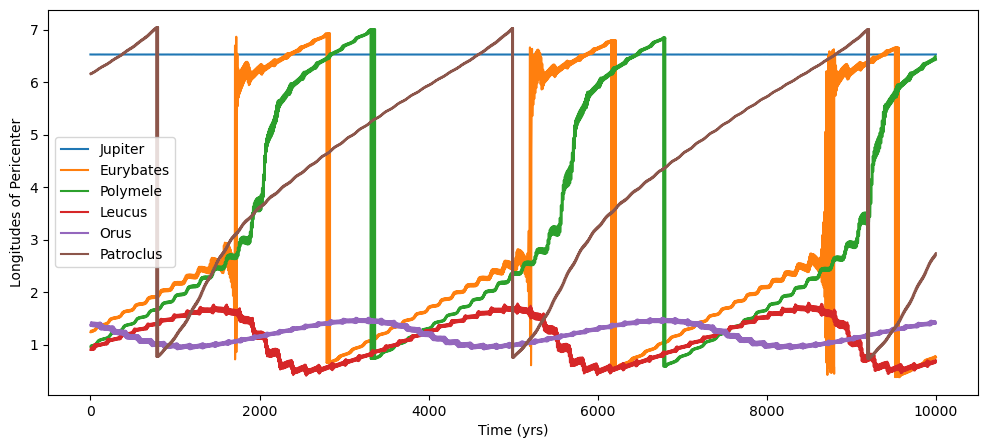

In [21]:
labels = ['Jupiter', 'Eurybates', 'Polymele', 'Leucus', 'Orus', 'Patroclus']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,varpi[0],label=labels[0])
plt.plot(times,varpi[1],label=labels[1])
plt.plot(times,varpi[2],label=labels[2])
plt.plot(times,varpi[3],label=labels[3])
plt.plot(times,varpi[4],label=labels[4])
plt.plot(times,varpi[5],label=labels[5])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Longitudes of Pericenter")
plt.legend();
#plt.savefig('long_per.png')

In [28]:
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	4.4.1
REBOUND built on:    	May  7 2024 19:50:41
Number of particles: 	10
Selected integrator: 	mercurius
Simulation time:     	1.0000000000000000e+05
Current timestep:    	1.000000
---------------------------------
<rebound.particle.Particle object at 0x1194a5350, m=39.47841760435743 x=-220.00707149225147 y=211.23365056376352 z=2.948555212660948 vx=-0.004765147691564862 vy=0.003989926472562065 vz=8.630765148355708e-05>
<rebound.particle.Particle object at 0x1194a51d0, m=0.03769743635904807 x=-223.13261686103112 y=207.0408881320301 z=3.0319017791907372 vx=2.134401542488912 vy=-1.710593849618012 vz=-0.039266806910179024>
<rebound.particle.Particle object at 0x1194a5350, m=0.01124986486620411 x=-223.35830378377332 y=202.57852359443945 z=3.2043663145042096 vx=1.8870572213137133 vy=-0.8912652283277129 vz=-0.06546127655850002>
<rebound.particle.Particle object at 0x1194a51d0, m=0.0017186469017235304 x=-230.54975943348265 y=227.96886360